In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
from functions.table import *

In [3]:
dataset = 'aug2020'
raw_data = f'../datasets/raw_data/{dataset}.csv'
month = '2020-08'
day_from = '09'
day_to = '12'
datetime_from = datetime.datetime.fromisoformat(f"{month}-{day_from}")
datetime_to = datetime.datetime.fromisoformat(f"{month}-{day_to}")

output_filename = f"../datasets/converted_data/temperatures_{dataset}_{day_from}-{day_to}.csv"

In [4]:
df = pd.read_csv(raw_data, sep=';')
df

,ts,BaroPressure,DewPoint,Humidity,Temperature,WindDirection,WindSpeed
0,1596229200075,977.4,11.8,77.3,14.8,301.3,2.2
1,1596229201071,977.4,11.8,77.3,14.8,304.4,2.2
2,1596229202077,977.4,11.8,77.3,14.8,305.8,2.2
3,1596229203097,977.4,11.8,77.3,14.8,305.4,2.2
4,1596229204057,977.4,11.7,77.3,14.8,304.1,2.2
...,...,...,...,...,...,...,...
2281250,1598907595717,979.8,13.1,48.4,23.2,278.6,2.9
2281251,1598907596712,979.8,13.1,48.4,23.2,281.0,2.9
2281252,1598907597708,979.8,13.1,48.4,23.2,285.2,2.9
2281253,1598907598704,979.8,13.1,48.4,23.2,285.6,2.8


In [5]:
dates = pd.Series(map(lambda x: datetime.datetime.fromtimestamp(x // 1000), df['ts']))
df_short = pd.DataFrame({
    "Time": dates,
    "Temperature": df['Temperature']
})

df_short

,Time,Temperature
0,2020-08-01 00:00:00,14.8
1,2020-08-01 00:00:01,14.8
2,2020-08-01 00:00:02,14.8
3,2020-08-01 00:00:03,14.8
4,2020-08-01 00:00:04,14.8
...,...,...
2281250,2020-08-31 23:59:55,23.2
2281251,2020-08-31 23:59:56,23.2
2281252,2020-08-31 23:59:57,23.2
2281253,2020-08-31 23:59:58,23.2


In [6]:
rows = df_short.loc[(df_short['Time'] >= datetime_from) & (df_short['Time'] < datetime_to)]
rows['Time'] = rows['Time'].map(lambda x: (x - datetime_from).total_seconds())
new_df = rows.set_index(['Time'])

new_df

C:\Users\mozha\AppData\Local\Temp\ipykernel_1560\3734979782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows['Time'] = rows['Time'].map(lambda x: (x - datetime_from).total_seconds())


,Temperature
Time,
0.0,19.3
1.0,19.3
2.0,19.3
3.0,19.3
4.0,19.3
...,...
259195.0,14.4
259196.0,14.4
259197.0,14.4


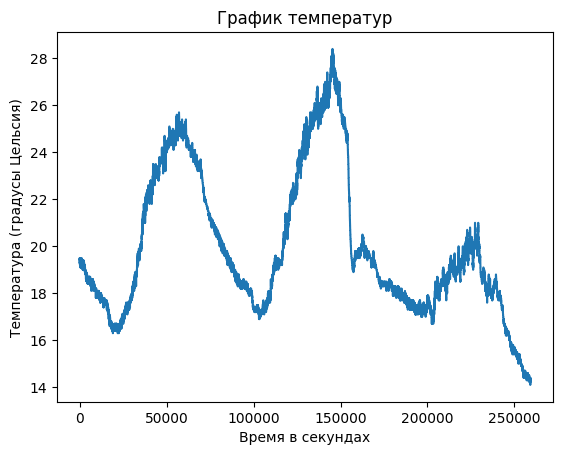

In [7]:
plt.plot(new_df.index, new_df['Temperature'])
plt.xlabel('Время в секундах')
plt.ylabel('Температура (градусы Цельсия)')
plt.title('График температур')
plt.show()

In [8]:
new_df.to_csv(output_filename, sep=';')